In [29]:

import pandas as pd

df = pd.read_excel("data/Delivery_data.xlsx")
df.head()

,Order ID,Delivery Address,Order Timestamp,Order Date,Order Hour,Order Days,Order Status,Driver ID,Vehicle Info,Current Location,Delivery Time (min),Delays (min),Customer Feedback,Route,Delivery Zone,Allocation Rules,Timestamp for Tracking
0,1001,"884 Main St, CityE",2023-09-04 13:33:00,2023-09-04,13,Monday,Completed,D59,Van A,CityE,92,13,Neutral,Route2,Zone2,Custom Rules,2023-09-01 13:48:00
1,1002,"55 Oak St, CityE",2023-09-01 15:47:00,2023-09-01,15,Friday,Completed,D4,Truck B,CityA,163,19,Positive,Route1,Zone3,Custom Rules,2023-09-01 14:02:00
2,1003,"123 Main St, CityE",2023-09-01 16:20:00,2023-09-01,16,Friday,Completed,D21,Truck B,CityD,192,0,Negative,Route1,Zone2,Custom Rules,2023-09-01 15:02:00
3,1004,"66 Cedar St, CityD",2023-09-03 14:41:00,2023-09-03,14,Sunday,Completed,D70,Truck B,CityA,143,17,Neutral,Route3,Zone3,Custom Rules,2023-09-01 15:23:00
4,1005,"748 Elm St, CityB",2023-09-01 11:23:00,2023-09-01,11,Friday,Completed,D77,Bike C,CityC,103,17,Negative,Route2,Zone1,Expedited Rules,2023-09-01 12:08:00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1500 non-null   int64         
 1   Delivery Address        1500 non-null   object        
 2   Order Timestamp         1500 non-null   datetime64[ns]
 3   Order Date              1500 non-null   datetime64[ns]
 4   Order Hour              1500 non-null   int64         
 5   Order Days              1500 non-null   object        
 6   Order Status            1500 non-null   object        
 7   Driver ID               1500 non-null   object        
 8   Vehicle Info            1500 non-null   object        
 9   Current Location        1500 non-null   object        
 10  Delivery Time (min)     1500 non-null   int64         
 11  Delays (min)            1500 non-null   int64         
 12  Customer Feedback       1500 non-null   object  

In [11]:
df.describe()

,Order ID,Order Timestamp,Order Date,Order Hour,Delivery Time (min),Delays (min),Timestamp for Tracking
count,1500.000000,1500,1500,1500.000000,1500.000000,1500.000000,1500
mean,1750.500000,2023-09-04 22:09:29.120000256,2023-09-04 09:43:40.800000,11.934667,151.770000,14.507333,2023-09-01 12:56:19.520000
min,1001.000000,2023-09-01 08:00:00,2023-09-01 00:00:00,8.000000,60.000000,0.000000,2023-09-01 08:03:00
25%,1375.750000,2023-09-02 16:20:00,2023-09-02 00:00:00,10.000000,107.750000,7.000000,2023-09-01 10:38:00
50%,1750.500000,2023-09-04 15:34:00,2023-09-04 00:00:00,12.000000,155.000000,14.000000,2023-09-01 13:00:00
75%,2125.250000,2023-09-06 15:42:30,2023-09-06 00:00:00,14.000000,195.250000,22.000000,2023-09-01 15:12:00
max,2500.000000,2023-09-08 16:58:00,2023-09-08 00:00:00,16.000000,239.000000,29.000000,2023-09-01 17:56:00
std,433.157015,NaN,NaN,2.590278,51.880473,8.582019,NaN


In [12]:
df_clean = df.copy()

In [13]:
df_clean.isnull().sum()

Order ID                  0
Delivery Address          0
Order Timestamp           0
Order Date                0
Order Hour                0
Order Days                0
Order Status              0
Driver ID                 0
Vehicle Info              0
Current Location          0
Delivery Time (min)       0
Delays (min)              0
Customer Feedback         0
Route                     0
Delivery Zone             0
Allocation Rules          0
Timestamp for Tracking    0
dtype: int64

In [15]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1500 non-null   int64         
 1   Delivery Address        1500 non-null   object        
 2   Order Timestamp         1500 non-null   datetime64[ns]
 3   Order Date              1500 non-null   datetime64[ns]
 4   Order Hour              1500 non-null   int64         
 5   Order Days              1500 non-null   object        
 6   Order Status            1500 non-null   object        
 7   Driver ID               1500 non-null   object        
 8   Vehicle Info            1500 non-null   object        
 9   Current Location        1500 non-null   object        
 10  Delivery Time (min)     1500 non-null   int64         
 11  Delays (min)            1500 non-null   int64         
 12  Customer Feedback       1500 non-null   object  

In [16]:
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[()]", "", regex=True)
)


In [17]:
df_clean["delays_min"].describe()


count    1500.000000
mean       14.507333
std         8.582019
min         0.000000
25%         7.000000
50%        14.000000
75%        22.000000
max        29.000000
Name: delays_min, dtype: float64

In [18]:
avg_delay_by_driver = (
    df_clean
    .groupby("driver_id")["delays_min"]
    .mean()
    .sort_values(ascending=False)
)

avg_delay_by_driver.head(10)


driver_id
D86    20.733333
D44    19.333333
D29    18.928571
D39    18.785714
D64    18.470588
D58    18.437500
D73    18.357143
D91    18.230769
D66    18.214286
D52    18.062500
Name: delays_min, dtype: float64

In [19]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                1500 non-null   int64         
 1   delivery_address        1500 non-null   object        
 2   order_timestamp         1500 non-null   datetime64[ns]
 3   order_date              1500 non-null   datetime64[ns]
 4   order_hour              1500 non-null   int64         
 5   order_days              1500 non-null   object        
 6   order_status            1500 non-null   object        
 7   driver_id               1500 non-null   object        
 8   vehicle_info            1500 non-null   object        
 9   current_location        1500 non-null   object        
 10  delivery_time_min       1500 non-null   int64         
 11  delays_min              1500 non-null   int64         
 12  customer_feedback       1500 non-null   object  

,order_id,delivery_address,order_timestamp,order_date,order_hour,order_days,order_status,driver_id,vehicle_info,current_location,delivery_time_min,delays_min,customer_feedback,route,delivery_zone,allocation_rules,timestamp_for_tracking
0,1001,"884 Main St, CityE",2023-09-04 13:33:00,2023-09-04,13,Monday,Completed,D59,Van A,CityE,92,13,Neutral,Route2,Zone2,Custom Rules,2023-09-01 13:48:00
1,1002,"55 Oak St, CityE",2023-09-01 15:47:00,2023-09-01,15,Friday,Completed,D4,Truck B,CityA,163,19,Positive,Route1,Zone3,Custom Rules,2023-09-01 14:02:00
2,1003,"123 Main St, CityE",2023-09-01 16:20:00,2023-09-01,16,Friday,Completed,D21,Truck B,CityD,192,0,Negative,Route1,Zone2,Custom Rules,2023-09-01 15:02:00
3,1004,"66 Cedar St, CityD",2023-09-03 14:41:00,2023-09-03,14,Sunday,Completed,D70,Truck B,CityA,143,17,Neutral,Route3,Zone3,Custom Rules,2023-09-01 15:23:00
4,1005,"748 Elm St, CityB",2023-09-01 11:23:00,2023-09-01,11,Friday,Completed,D77,Bike C,CityC,103,17,Negative,Route2,Zone1,Expedited Rules,2023-09-01 12:08:00


In [20]:
df_clean["delays_min"].describe()

count    1500.000000
mean       14.507333
std         8.582019
min         0.000000
25%         7.000000
50%        14.000000
75%        22.000000
max        29.000000
Name: delays_min, dtype: float64

In [21]:
avg_delay_by_driver = (
    df_clean
    .groupby("driver_id")["delays_min"]
    .mean()
    .sort_values(ascending=False)
)

avg_delay_by_driver.head(10)


driver_id
D86    20.733333
D44    19.333333
D29    18.928571
D39    18.785714
D64    18.470588
D58    18.437500
D73    18.357143
D91    18.230769
D66    18.214286
D52    18.062500
Name: delays_min, dtype: float64

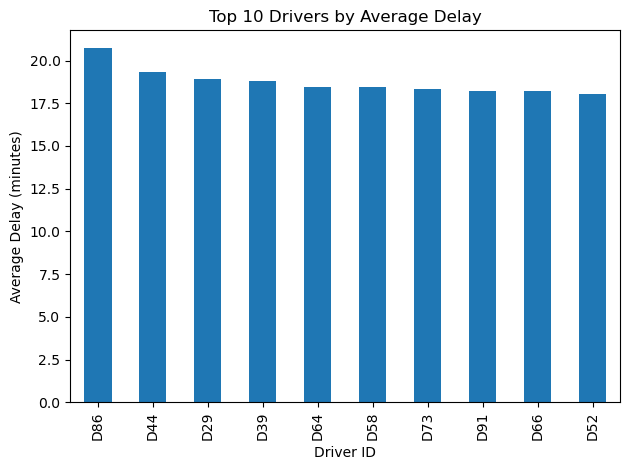

In [22]:
import matplotlib.pyplot as plt

avg_delay_by_driver.head(10).plot(kind="bar")
plt.title("Top 10 Drivers by Average Delay")
plt.xlabel("Driver ID")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.show()


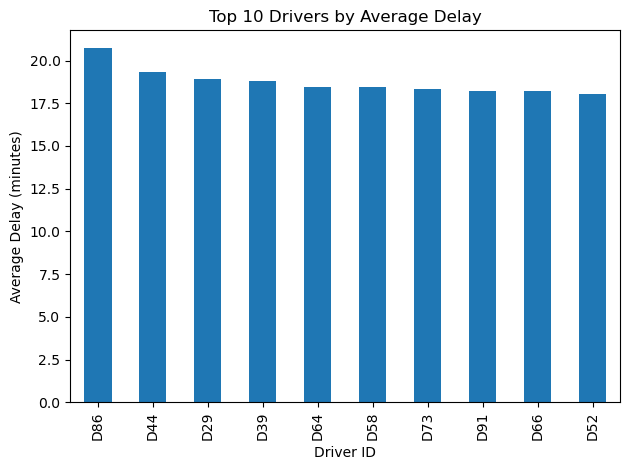

In [23]:
import os
os.makedirs("visuals", exist_ok=True)

avg_delay_by_driver.head(10).plot(kind="bar")
plt.title("Top 10 Drivers by Average Delay")
plt.xlabel("Driver ID")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.savefig("visuals/avg_delay_by_driver.png")
plt.show()


In [24]:
avg_delay_by_zone = (
    df_clean
    .groupby("delivery_zone")["delays_min"]
    .mean()
    .sort_values(ascending=False)
)

avg_delay_by_zone


delivery_zone
Zone2    14.671815
Zone3    14.630670
Zone1    14.233141
Name: delays_min, dtype: float64

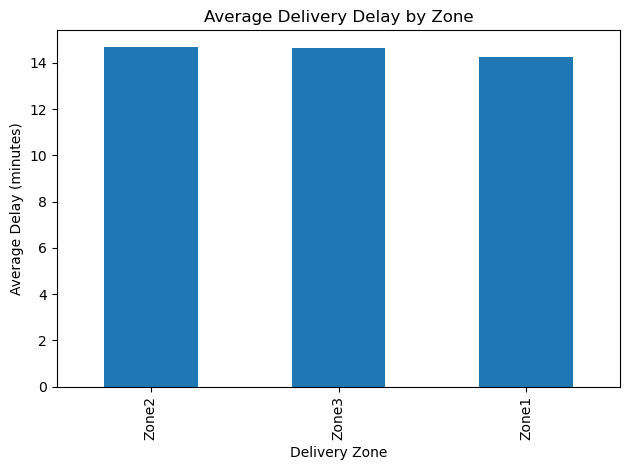

In [25]:
avg_delay_by_zone.plot(kind="bar")
plt.title("Average Delivery Delay by Zone")
plt.xlabel("Delivery Zone")
plt.ylabel("Average Delay (minutes)")
plt.tight_layout()
plt.savefig("visuals/avg_delay_by_zone.png")
plt.show()


In [26]:
avg_delay_by_hour = (
    df_clean
    .groupby("order_hour")["delays_min"]
    .mean()
)

avg_delay_by_hour


order_hour
8     13.810976
9     13.954802
10    15.051546
11    14.781818
12    14.418440
13    15.936709
14    13.564516
15    15.027027
16    14.185629
Name: delays_min, dtype: float64

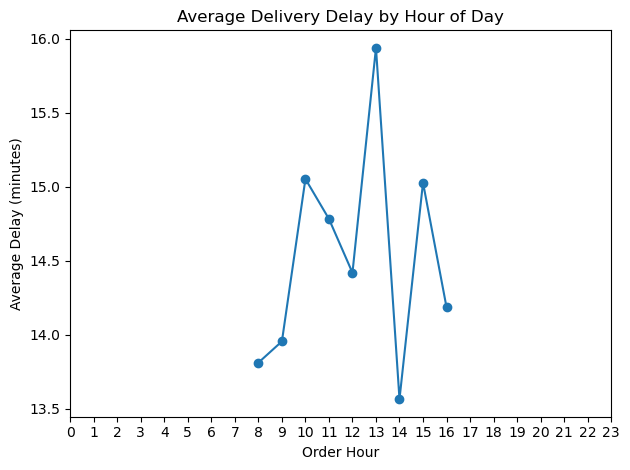

In [27]:
avg_delay_by_hour.plot(kind="line", marker="o")
plt.title("Average Delivery Delay by Hour of Day")
plt.xlabel("Order Hour")
plt.ylabel("Average Delay (minutes)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig("visuals/avg_delay_by_hour.png")
plt.show()


In [31]:
df_clean["on_time"] = df_clean["delays_min"].apply(lambda x: "On Time" if x <= 0 else "Delayed")


In [32]:
df_clean["on_time"].value_counts(normalize=True) * 100


on_time
Delayed    96.933333
On Time     3.066667
Name: proportion, dtype: float64

In [33]:
driver_delay_stats = (
    df_clean
    .groupby("driver_id")["delays_min"]
    .agg(["mean", "std", "count"])
    .sort_values("mean", ascending=False)
)

driver_delay_stats.head(10)


,mean,std,count
driver_id,,,
D86,20.733333,8.319226,15
D44,19.333333,6.485415,12
D29,18.928571,7.184002,14
D39,18.785714,6.411271,14
D64,18.470588,8.668316,17
D58,18.437500,9.018268,16
D73,18.357143,9.187007,14
D91,18.230769,7.529429,13
D66,18.214286,7.556745,14


In [34]:
df_clean["delays_min"].quantile([0.90, 0.95, 0.99])


0.90    26.0
0.95    28.0
0.99    29.0
Name: delays_min, dtype: float64

In [35]:
df_clean[["delivery_time_min", "delays_min"]].corr()


,delivery_time_min,delays_min
delivery_time_min,1.000000,-0.009465
delays_min,-0.009465,1.000000


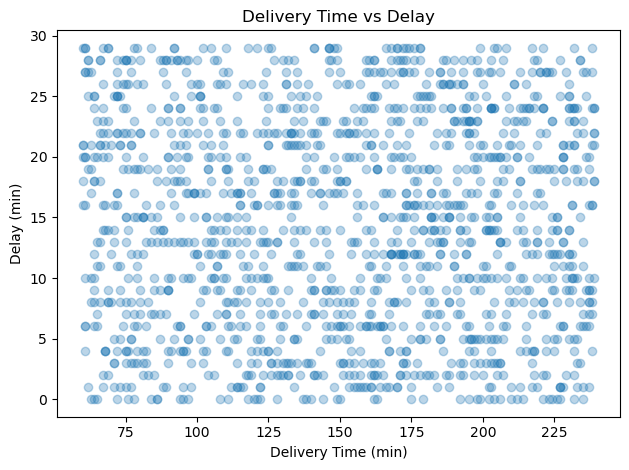

In [36]:
plt.scatter(df_clean["delivery_time_min"], df_clean["delays_min"], alpha=0.3)
plt.xlabel("Delivery Time (min)")
plt.ylabel("Delay (min)")
plt.title("Delivery Time vs Delay")
plt.tight_layout()
plt.show()


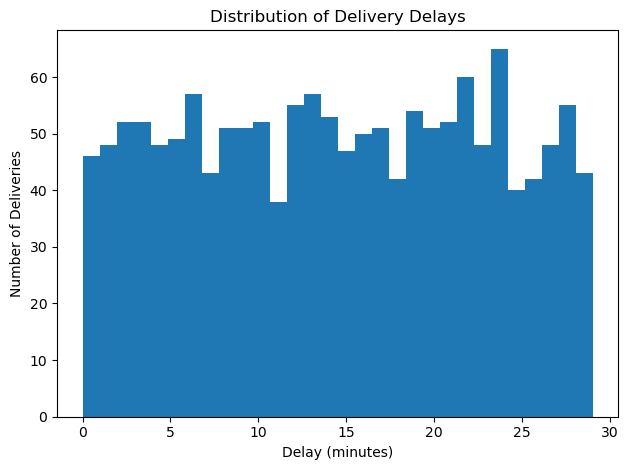

In [37]:
plt.hist(df_clean["delays_min"], bins=30)
plt.title("Distribution of Delivery Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Number of Deliveries")
plt.tight_layout()
plt.savefig("visuals/delay_distribution.png")
plt.show()


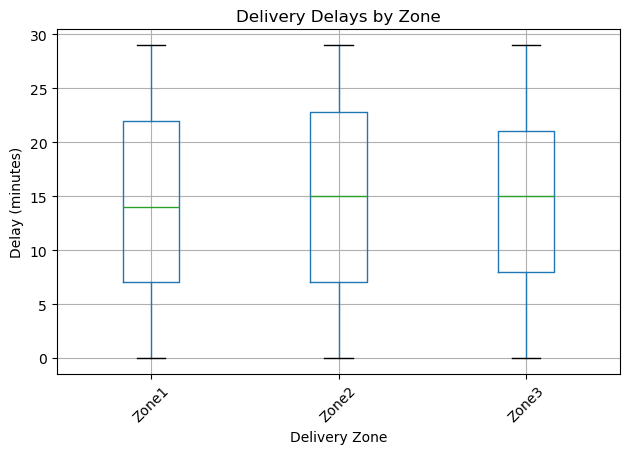

In [38]:
df_clean.boxplot(
    column="delays_min",
    by="delivery_zone",
    rot=45
)
plt.title("Delivery Delays by Zone")
plt.suptitle("")
plt.xlabel("Delivery Zone")
plt.ylabel("Delay (minutes)")
plt.tight_layout()
plt.savefig("visuals/delay_by_zone_boxplot.png")
plt.show()


In [39]:
df_clean["delivery_status"] = df_clean["delays_min"].apply(
    lambda x: "On Time" if x <= 0 else "Delayed"
)


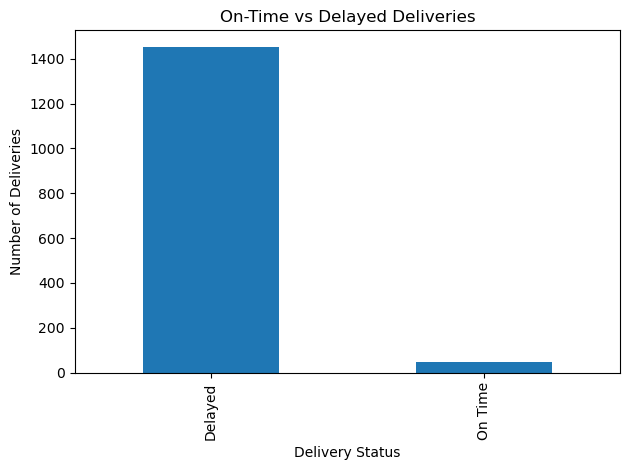

In [40]:
df_clean["delivery_status"].value_counts().plot(kind="bar")
plt.title("On-Time vs Delayed Deliveries")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Deliveries")
plt.tight_layout()
plt.savefig("visuals/on_time_vs_delayed.png")
plt.show()


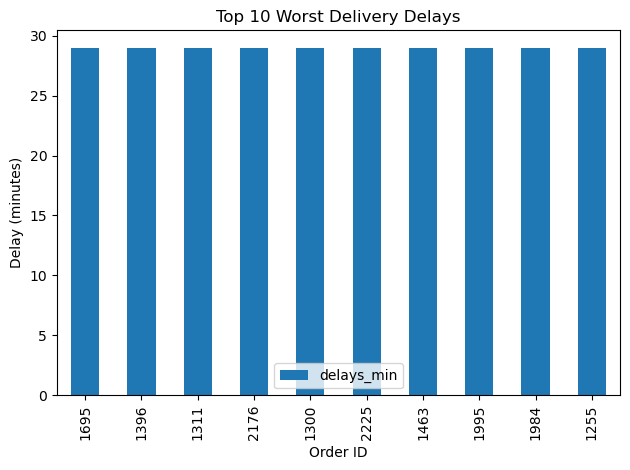

In [41]:
worst_delays = df_clean.sort_values("delays_min", ascending=False).head(10)

worst_delays.plot(
    x="order_id",
    y="delays_min",
    kind="bar"
)
plt.title("Top 10 Worst Delivery Delays")
plt.xlabel("Order ID")
plt.ylabel("Delay (minutes)")
plt.tight_layout()
plt.savefig("visuals/top_worst_delays.png")
plt.show()


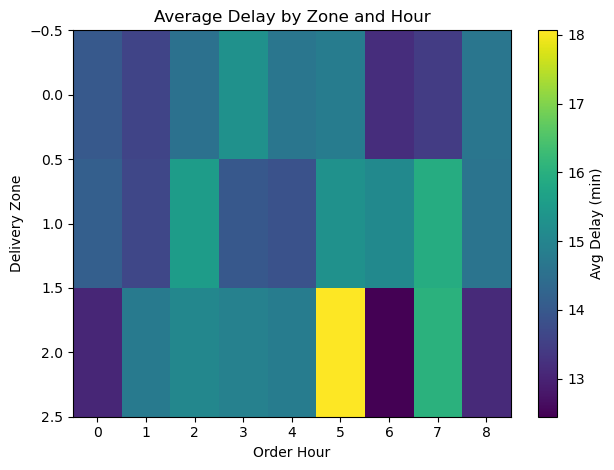

In [42]:
pivot = df_clean.pivot_table(
    values="delays_min",
    index="delivery_zone",
    columns="order_hour",
    aggfunc="mean"
)

plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Avg Delay (min)")
plt.title("Average Delay by Zone and Hour")
plt.xlabel("Order Hour")
plt.ylabel("Delivery Zone")
plt.tight_layout()
plt.savefig("visuals/delay_heatmap.png")
plt.show()


In [43]:
import os
os.getcwd()


'/Users/nurudeenoloruntele/Desktop/Delivery data analysis'